# Túlélés a Titanicon
A csatolt két adatbázis a Titanic utasainak adatait tartalmazza, illetve egy bináris változót, ami azt jelzi hogy az adott utas túlélte-e a balesetet. A rendelkezésre álló train adatbázison készíts egy statisztikai modell-t amely a balesetben történt elhalálozás valószínűségét becsüli meg. A feladatot bármilyen programnyelvben el lehet végezni, azonban a Python-ban vagy R-ben benyújtott válaszok extra pontot jelentenek.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import random

In [2]:
data = pd.read_csv('DA_titanic_train.csv')

# convert Sex to numeric values
# female -> 1
# male -> 0
data["Sex"]=data["Sex"].apply(lambda x: 1 if x=="female" else 0)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
4,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C


Check the content of the dataset:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  624 non-null    int64  
 1   Survived     624 non-null    int64  
 2   Pclass       624 non-null    int64  
 3   Name         624 non-null    object 
 4   Sex          624 non-null    int64  
 5   Age          494 non-null    float64
 6   SibSp        624 non-null    int64  
 7   Parch        624 non-null    int64  
 8   Ticket       624 non-null    object 
 9   Fare         624 non-null    float64
 10  Cabin        128 non-null    object 
 11  Embarked     623 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 58.6+ KB


The Age is an important factor here, therefore rows with missing Age values cannot be used:

In [4]:
data=data[data['Age'].notna()]

Some visualizations for better understanding of the data:

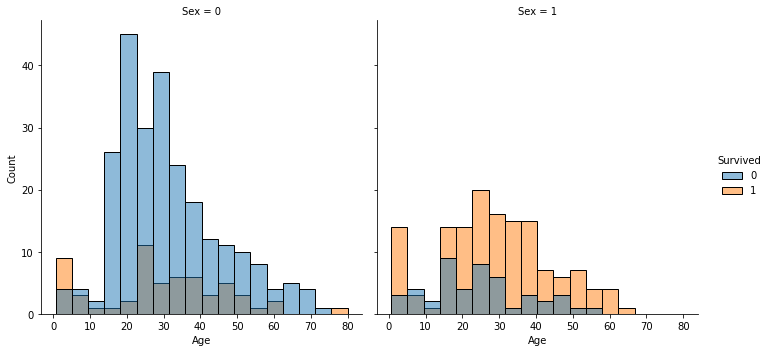

In [5]:
sns.displot(data=data, x="Age",hue="Survived", col="Sex");

Women more likely survived the accident.

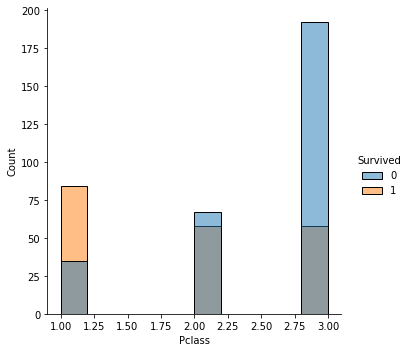

In [6]:
sns.displot(data=data, x="Pclass", hue="Survived");

Also passangers from the first class had a better chance of survival.

The qualitites which have an important role surviving the accident are Age, Sex and Class.

In [7]:
# important features
X=data[["Pclass","Sex","Age"]]
y=data["Survived"]

Standardize the data to zero mean and unit variance:

In [8]:
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X

array([[ 0.89330592, -0.78382338, -0.51903233],
       [-1.53806115,  1.27579762,  0.56528597],
       [ 0.89330592,  1.27579762, -0.24795276],
       ...,
       [ 0.89330592, -0.78382338, -0.31572265],
       [-1.53806115,  1.27579762, -0.72234201],
       [ 0.89330592, -0.78382338,  0.15866661]])

Splitting the data randomly to training (90%) and testing part (10%) four times to test the accuracy of the prediction. 

The method I used for prediction is K-Nearest Neighbors where we find the K nearest neighbors based on the known qualities and  
the predicted value will be the majority of the labels belonging to the K nearest neighbors.

In [9]:
# Split the available data to train and test part 
k_validation=4

# maximum number of nearest neighbors
K=20

# store the prediction result of the four test cases
test_accuracy=np.zeros((k_validation,K-1))
accuracy_std=np.zeros((k_validation,K-1))

for i in range(k_validation):
    # split to training and testing part
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    accuracy_act=np.zeros((K-1))
    accuracy_std_act=np.zeros((K-1))

    # # train the model, predict and calculate the accuracy for each K
    for n in range(1,K):
        neighbors=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
        y_pred=neighbors.predict(X_test)
        accuracy_act[n-1]=metrics.accuracy_score(y_test,y_pred)
        accuracy_std_act[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])

    test_accuracy[i]=accuracy_act
    accuracy_std[i]=accuracy_std_act

The best K would be the one of which the average performance is the most accurate.

In [10]:
k_opt=np.where(test_accuracy.mean(axis=0)==np.amax(test_accuracy.mean(axis=0)))[0][0]+1

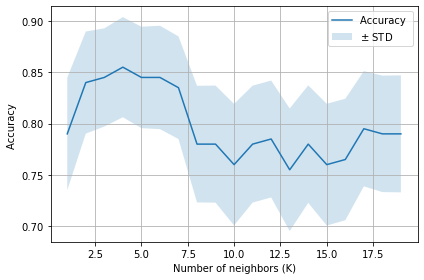

In [11]:
plt.plot(range(1,K),test_accuracy.mean(axis=0))
plt.fill_between(range(1,K),test_accuracy.mean(axis=0)-1*accuracy_std.mean(axis=0),test_accuracy.mean(axis=0)+1*accuracy_std.mean(axis=0), alpha=0.20)
plt.legend(('Accuracy ', '$\pm$ STD'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of neighbors (K)')
plt.tight_layout()
plt.grid()
plt.show()

In [12]:
print("The best accuracy was with k=",k_opt) 

The best accuracy was with k= 4


Test dataset:

In [13]:
test_data=pd.read_csv("DA_titanic_test.csv")
test_data["Sex"]=test_data["Sex"].apply(lambda x: 1 if x=="female" else 0)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
1,6,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q
2,7,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
3,8,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
4,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S


In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  267 non-null    int64  
 1   Pclass       267 non-null    int64  
 2   Name         267 non-null    object 
 3   Sex          267 non-null    int64  
 4   Age          220 non-null    float64
 5   SibSp        267 non-null    int64  
 6   Parch        267 non-null    int64  
 7   Ticket       267 non-null    object 
 8   Fare         267 non-null    float64
 9   Cabin        76 non-null     object 
 10  Embarked     266 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 23.1+ KB


There are missing values in the Age column, so I replacced them with a random value fro mthe available Ages.

In [15]:
test_data["Age"]=test_data["Age"].fillna(random.choices(test_data["Age"].values)[0])

Repeat the standardization and the training on the whole available training data in the train.csv (except the records with missing Age).

In [16]:
X_test=test_data[["Pclass","Sex","Age"]]
X_test=preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
neighbors=KNeighborsClassifier(n_neighbors=k_opt).fit(X,y)
y_pred=neighbors.predict(X_test)

Expand the test table with the predicted Survived values.

In [17]:
test_data["Survived"]=y_pred
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1
1,6,3,"Moran, Mr. James",0,42.0,0,0,330877,8.4583,NaN,Q,0
2,7,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,0
3,8,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,0
4,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
262,880,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,56.0,0,1,11767,83.1583,C50,C,1
263,882,3,"Markun, Mr. Johann",0,33.0,0,0,349257,7.8958,NaN,S,0
264,886,3,"Rice, Mrs. William (Margaret Norton)",1,39.0,0,5,382652,29.1250,NaN,Q,1
265,887,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,0


In [18]:
test_data.to_csv("Titanic_prediction.csv")